In [2]:
%load_ext autoreload
%autoreload 2

# retina quality
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.constants import G, c
from astropy import units as u
from scipy.stats import rv_histogram
from scipy.special import logsumexp

In [4]:
cd /Users/lambwg/Documents/Vanderbilt/Research/astro/

/Users/lambwg/Documents/Vanderbilt/Research/astro


In [5]:
from scripts import pop_synth

# Variation relations

In [ ]:
## Make a binary distribution function going as f^{-8/3}

A = 1e-22 # arbitrary
f = np.linspace(1e-9,1e-7,int(1e6)) # frequncy grid
fbmid = 0.5 * (f[1:] + f[:-1]) # middle of grid cells
Nf = A * fbmid**(-8./3.) # dt / d(lnf) for GW emission

In [ ]:
plt.loglog(fbmid, Nf)
plt.xlabel(r'$GW frequency (Hz)')

In [ ]:
test = ss.rv_histogram((Nf,f)) # make a scipy.stats object

In [ ]:
## Create structures for Omega_gw across realizations

bins = np.arange(1, 30) / 365.25 / 86400.0 / 20.0 # 20-year bins
bmid = 0.5 * (bins[1:] + bins[:-1]) # bin mids

omega = np.zeros((bmid.shape[0], int(1e4))) # frequency-bins x realizations

In [ ]:
# Make Omega_gw spectrum for each realization

for jj in range(omega.shape[1]):

  freqs = test.rvs(size=int(1e4))
  mask = np.digitize(freqs, bins) - 1

  for ii, bin in enumerate(bmid):
    omega[ii, jj] = np.sum(freqs[mask==ii]**(10./3.))

The variance of the following quantities can be deduced analytically.

In [ ]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj], alpha=0.2, color='C0')
plt.loglog(bmid, 2.8e-25 * (bmid/fyr)**(+2/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$\Omega_\mathrm{GW}(f)$');

In [ ]:
## Variance of Omega_gw

plt.loglog(bmid, np.var(omega, axis=1))
plt.loglog(bmid, 3e-20*bmid**(4.))

In [ ]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj]/bmid**2, alpha=0.2, color='C0')
plt.loglog(bmid, 2.6e-10 * (bmid/fyr)**(-4/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)^2$');

In [ ]:
# variance of hc^2

#plt.loglog(bmid, np.var(omega, axis=1) / bmid**2)
plt.loglog(bmid, np.var(omega, axis=1) / bmid**4)
plt.loglog(bmid, np.var(omega/bmid[:, None]**2, axis=1))
#plt.loglog(bmid, 1e-3*bmid**(2.))
#plt.loglog(bmid, 5e-20*bmid**(2.))
plt.loglog(bmid, 2.6e-20*np.ones_like(bmid))
plt.xlabel('GW frequency [Hz]')
plt.ylabel(r'Var($h_\mathrm{c}(f)^2$)')

In [ ]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, np.sqrt(omega[:, jj]/bmid**2), alpha=0.2, color='C0')
plt.loglog(bmid, 1.6e-5 * (bmid/fyr)**(-2/3.), color='C1')
plt.loglog(bmid[15:], 9.e-6 * (bmid[15:]/fyr)**(+2/3.), color='C2')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)$');

In [ ]:
# variance of PSD

#plt.loglog(bmid, np.var(omega, axis=1) / bmid**2. / bmid**3)
#plt.loglog(bmid, 2e-20*bmid**(-1.))

plt.loglog(bmid, np.var(omega/bmid[:, None]**5, axis=1))
plt.loglog(bmid, 2.5e-20*bmid**-6)

The following quantities don't seem to obey the scalings one would get from transforming variables. I've just tweaked the fits to be reasonable.

In [ ]:
# variance of h_c

plt.loglog(bmid, np.var(np.sqrt(omega/bmid[:, None]**2), axis=1))
plt.loglog(bmid, 1e-1*bmid**(4./3.))

In [ ]:
# variance of 0.5*log10(rho^2)
plt.loglog(bmid, np.var(0.5*np.log10(omega / bmid[:, None]**5.), axis=1))
plt.loglog(bmid, 2e17*bmid**(8./3.))

# For a general $dt/df$...

Let $\frac{dt}{df} \propto f^\lambda$

For stellar scattering, $\lambda = -7/3$

In [ ]:
## Make a binary distribution function going as f^lambda

A = 1e-22 # arbitrary
f = np.linspace(1e-9,1e-7,int(1e6)) # frequncy grid
fbmid = 0.5 * (f[1:] + f[:-1]) # middle of grid cells

lamb_da = -7/3  # stellar scattering
Nf = A * fbmid**(lamb_da + 1) # dt / d(lnf) for GW emission = f * df/dt

In [ ]:
plt.loglog(fbmid, Nf)
plt.xlabel(r'$GW frequency (Hz)')
plt.ylabel(r'$A\ dt/d\ln{f}$')

In [ ]:
test = ss.rv_histogram((Nf,f)) # make a scipy.stats object

In [ ]:
## Create structures for Omega_gw across realizations

bins = np.arange(1, 30) / 365.25 / 86400.0 / 20.0 # 20-year bins
bmid = 0.5 * (bins[1:] + bins[:-1]) # bin mids

omega = np.zeros((bmid.shape[0], int(1e4))) # frequency-bins x realizations

In [ ]:
# Make Omega_gw spectrum for each realization

for jj in range(omega.shape[1]):

  freqs = test.rvs(size=int(1e4))
  mask = np.digitize(freqs, bins) - 1

  for ii, bin in enumerate(bmid):
    omega[ii, jj] = np.sum(freqs[mask==ii]**(10./3.))   # ~ SUM dE/dt * dt/dlnf

$$\Omega(f) \propto f^{\lambda + 13/3}$$

$$\mathrm{Var}(\Omega(f)) \propto f^{\lambda + 23/3}$$

In [ ]:
# Plot omega for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj], alpha=0.2, color='C0')
plt.loglog(bmid, 7e-24 * (bmid/fyr)**(lamb_da + 13/3), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$\Omega_\mathrm{GW}(f)$');

In [ ]:
## Variance of Omega_gw
plt.loglog(bmid, np.var(omega, axis=1))
plt.loglog(bmid, 3e-8*bmid**(lamb_da + 23/3.))


$$h_\mathrm{c}^2(f) \propto f^{\lambda + 7/3}$$

$$\mathrm{Var}(h_\mathrm{c}^2(f) ) \propto f^{\lambda + 11/3}$$

In [ ]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj]/bmid**2, alpha=0.2, color='C0')
plt.loglog(bmid, 7e-9 * (bmid/fyr)**(lamb_da + 7/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)^2$');

In [ ]:
# variance of hc^2

#plt.loglog(bmid, np.var(omega, axis=1) / bmid**2)
plt.loglog(bmid, np.var(omega, axis=1) / bmid**4)
plt.loglog(bmid, np.var(omega/bmid[:, None]**2, axis=1))
#plt.loglog(bmid, 1e-3*bmid**(2.))
#plt.loglog(bmid, 5e-20*bmid**(2.))
plt.loglog(bmid, 6.e-9*bmid**(lamb_da + 11/3))
plt.xlabel('GW frequency [Hz]')
plt.ylabel(r'Var($h_\mathrm{c}(f)^2$)')

$$h_\mathrm{c}(f) \propto f^{(\lambda + 7/3)/2}$$

$$\mathrm{Var}(h_\mathrm{c}(f) ) \propto f^{4/3}$$

In [ ]:
# Plot h_c for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, np.sqrt(omega[:, jj]/bmid**2), alpha=0.2, color='C0')
plt.loglog(bmid, 8.3e-5 * (bmid/fyr)**((lamb_da + 7/3.)/2), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)^2$');

In [ ]:
# variance of h_c
plt.loglog(bmid, np.var(np.sqrt(omega/bmid[:, None]**2), axis=1))
plt.loglog(bmid, 1e-1*bmid**(4./3.))

$$\rho^2(f) \propto f^{\lambda - 2/3}$$

$$\mathrm{Var}(\rho^2(f) ) \propto f^{\lambda - 7/3}$$

In [ ]:
# Plot psd for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, omega[:, jj]/bmid**5, alpha=0.2, color='C0')
plt.loglog(bmid, 2e14 * (bmid/fyr)**(lamb_da-2/3.), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$h_\mathrm{c}(f)$');

In [ ]:
# variance of PSD

#plt.loglog(bmid, np.var(omega, axis=1) / bmid**2. / bmid**3)
#plt.loglog(bmid, 2e-20*bmid**(-1.))

plt.loglog(bmid, np.var(omega/bmid[:, None]**5, axis=1))
plt.loglog(bmid, 2.5e-10*bmid**(lamb_da-7/3))

$$\log(\rho(f)) \propto \log(f^{(\lambda - 2/3)/2})$$

$$\mathrm{Var}(\rho(f)) \propto \log(f^{-(\lambda + 1)})$$

In [ ]:
# Plot psd for all realizations
fyr = 1 / 365.25 / 86400.0

for jj in range(omega.shape[1]):
  plt.loglog(bmid, (omega[:, jj]/bmid**5)**0.5, alpha=0.2, color='C0')
plt.loglog(bmid, 1e7 * (bmid/fyr)**((lamb_da-2/3.)/2), color='C1')

plt.xlabel('GW frequency [Hz]');
plt.ylabel(r'$\rho^2(f)$');

In [ ]:
# variance of 0.5*log10(rho^2)
plt.loglog(bmid, np.var(0.5*np.log10(omega / bmid[:, None]**5.), axis=1))
plt.loglog(bmid, 2e6*bmid**-(lamb_da+1))

# Sato-Polito & Kamiowkowski population simulation

In [266]:
# define models
# MODEL 1
model1 = dict(alpha=1, log10_M_star=np.log10(3.2*10**7), beta=3, z0=3, n0_dot=9.85e-3)
model2 = dict(alpha=0.5, log10_M_star=np.log10(7.5*10**7), beta=2.5, z0=2.4, n0_dot=5.77e-3)
model3 = dict(alpha=0., log10_M_star=np.log10(1.8*10**8), beta=2, z0=1.8, n0_dot=2.24e-3)
model4 = dict(alpha=-0.5, log10_M_star=np.log10(4.2*10**8), beta=1.5, z0=1.1, n0_dot=9.78e-4)
model5 = dict(alpha=-1, log10_M_star=9., beta=1, z0=0.5, n0_dot=5.23e-4)

In [269]:
Tspan = 20 * 365.24 * 86400.0
bins = 1000
ps = pop_synth.PopSynth(zbins=100, log10Mbins=bins, Tspan=Tspan,
                        model_params=model5)

In [270]:
ps.max_mass

array([9.99399399, 9.9039039 , 9.83383383, 9.77377377, 9.72372372,
       9.67867868, 9.63863864, 9.6036036 , 9.56356356, 9.53353353,
       9.4984985 , 9.46846847, 9.43843844, 9.40840841, 9.37837838,
       9.35335335, 9.32332332, 9.2982983 , 9.27327327, 9.24824825,
       9.21821822, 9.19319319, 9.16816817, 9.14314314, 9.11811812,
       9.09309309, 9.07307307, 9.04804805, 9.02302302, 8.997998  ])

Text(0, 0.5, '$\\log_{10} dn/dz d\\log_{10}\\mathcal{M}$')

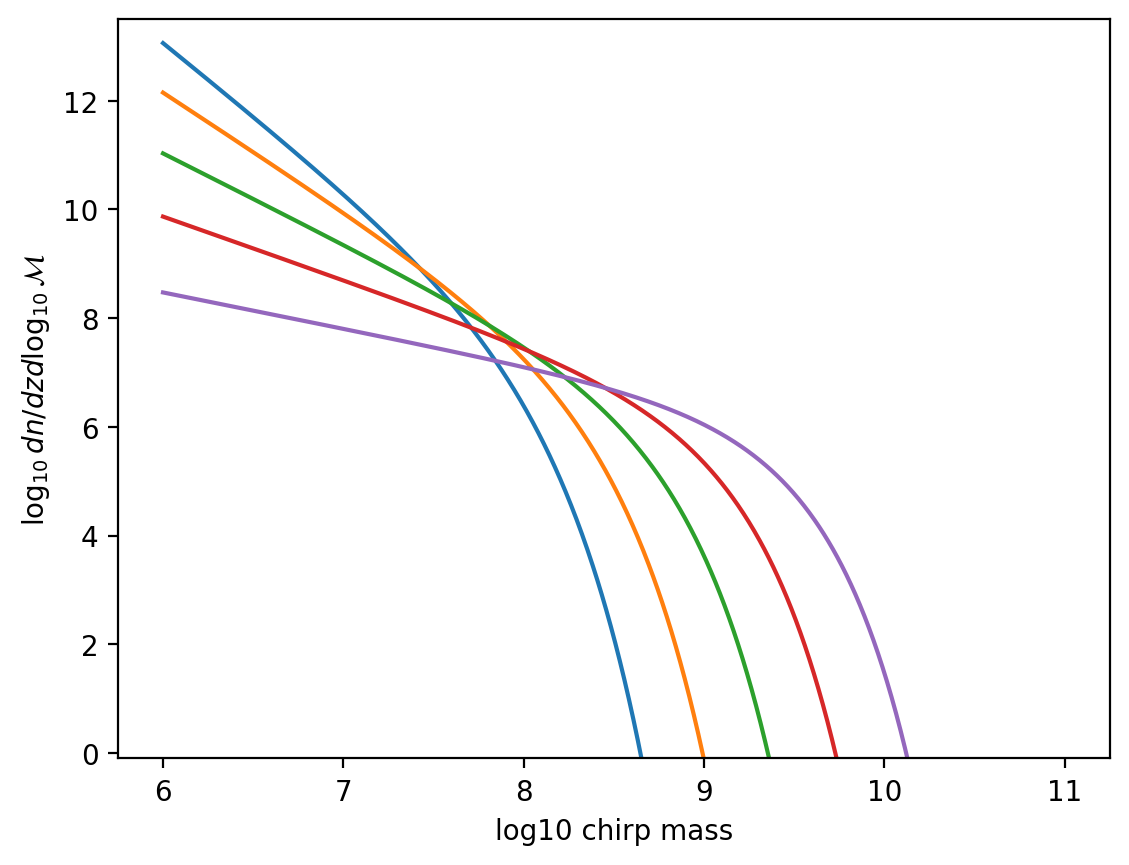

In [271]:
log10_M = np.linspace(6, 11, 1000)
[plt.plot(ps.log10_M, ps.smbhb_number_per_bin(ps.log10_f[0], 1, log10_M, model))
 for model in [model1, model2, model3, model4, model5]];
plt.ylim(-0.1, 13.5)
plt.xlabel('log10 chirp mass')
plt.ylabel(r'$\log_{10} dn/dz d\log_{10}\mathcal{M}$')

Text(0, 0.5, '$\\log_{10} dn/dz d\\log_{10}\\mathcal{M}$')

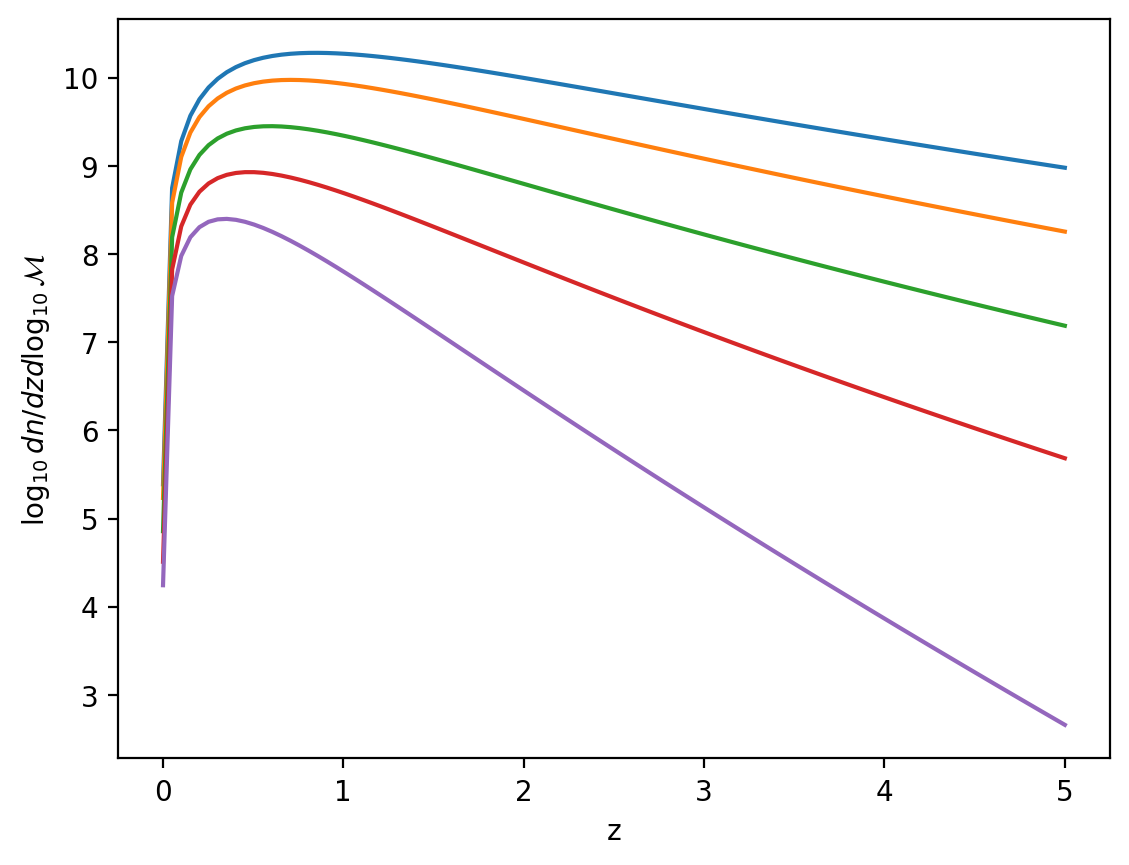

In [272]:
[plt.plot(ps.z, ps.smbhb_number_per_bin(ps.log10_f[0], ps.z, 7., model))
 for model in [model1, model2, model3, model4, model5]];
#plt.ylim(0, 12)
plt.xlabel('z')
plt.ylabel(r'$\log_{10} dn/dz d\log_{10}\mathcal{M}$')

Text(0, 0.5, 'log10(dE/dlog10 f)')

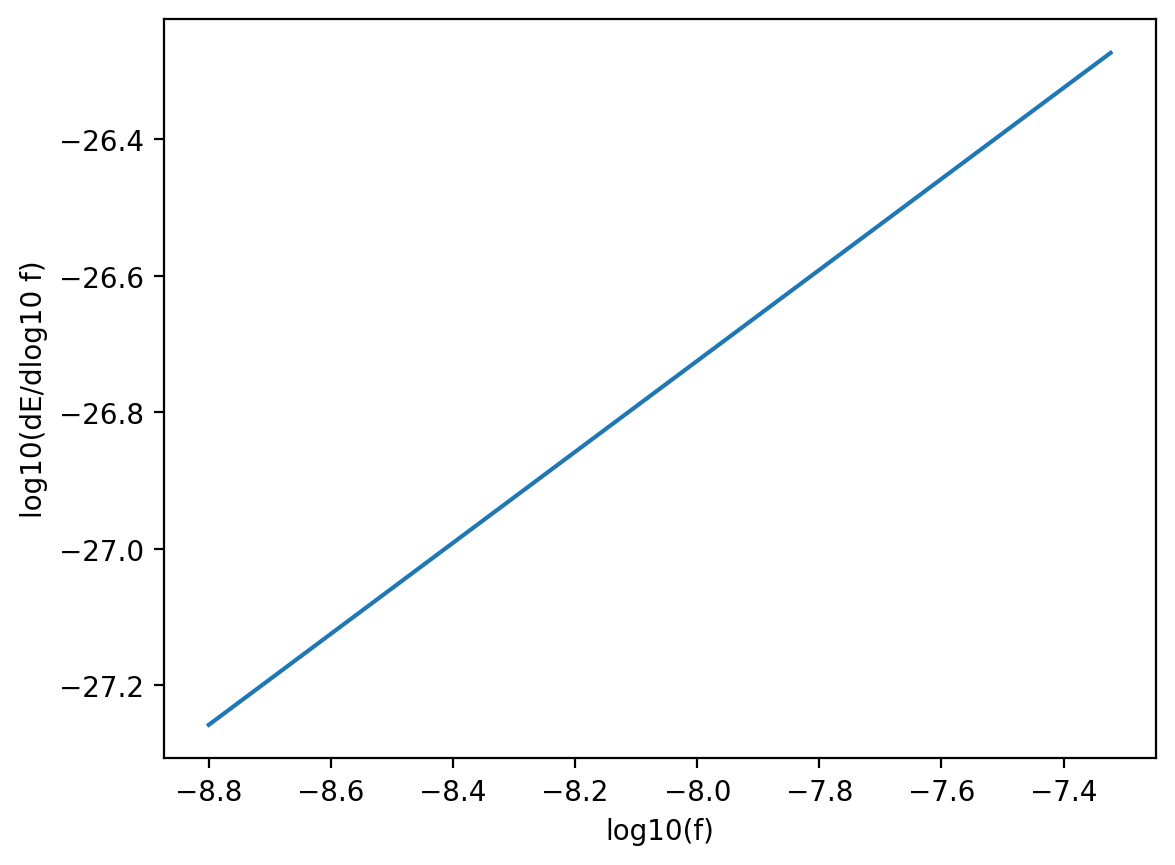

In [273]:
log10_dE_df = ps.log10_dE_dfr(ps.log10_f, 6, 2)
plt.plot(ps.log10_f, log10_dE_df)
plt.xlabel('log10(f)')
plt.ylabel('log10(dE/dlog10 f)')

In [279]:
log10_hc2_ideal = ps.log10_hc2_ideal(ps.log10_M, ps.z, model1)
print(log10_hc2_ideal)

[-26.73054194 -27.13191587 -27.36670604 -27.53329393 -27.66251291
 -27.76809416 -27.85736579 -27.9347018  -28.00291887 -28.06394656
 -28.11915947 -28.16956261 -28.21594557 -28.25888536 -28.29886738
 -28.33627479 -28.3714211  -28.40456617 -28.43592782 -28.46565912
 -28.49397624 -28.52098727 -28.5467675  -28.5714995  -28.59518552
 -28.61794709 -28.63991074 -28.66102933 -28.68141215 -28.70117935
 -28.7202402  -28.73870204 -28.75660214 -28.77397442 -28.79094434
 -28.80735603 -28.82332555 -28.83887691 -28.85403225 -28.86881206
 -28.88323533 -28.89731967 -28.91108149 -28.92453606 -28.93769765
 -28.95057959 -28.96319436 -28.97538554 -28.98749348 -28.99936714
 -29.01101625 -29.02245    -29.03367707 -29.04470566 -29.0553309
 -29.06597732 -29.07644714 -29.08674699 -29.09688316 -29.10661548
 -29.11643308 -29.12610392 -29.13563316 -29.14475239 -29.1540036
 -29.16312719 -29.17183501 -29.18070631 -29.18946221 -29.19779414
 -29.20632027 -29.21474175 -29.2227289  -29.23094044 -29.23905686
 -29.2467266

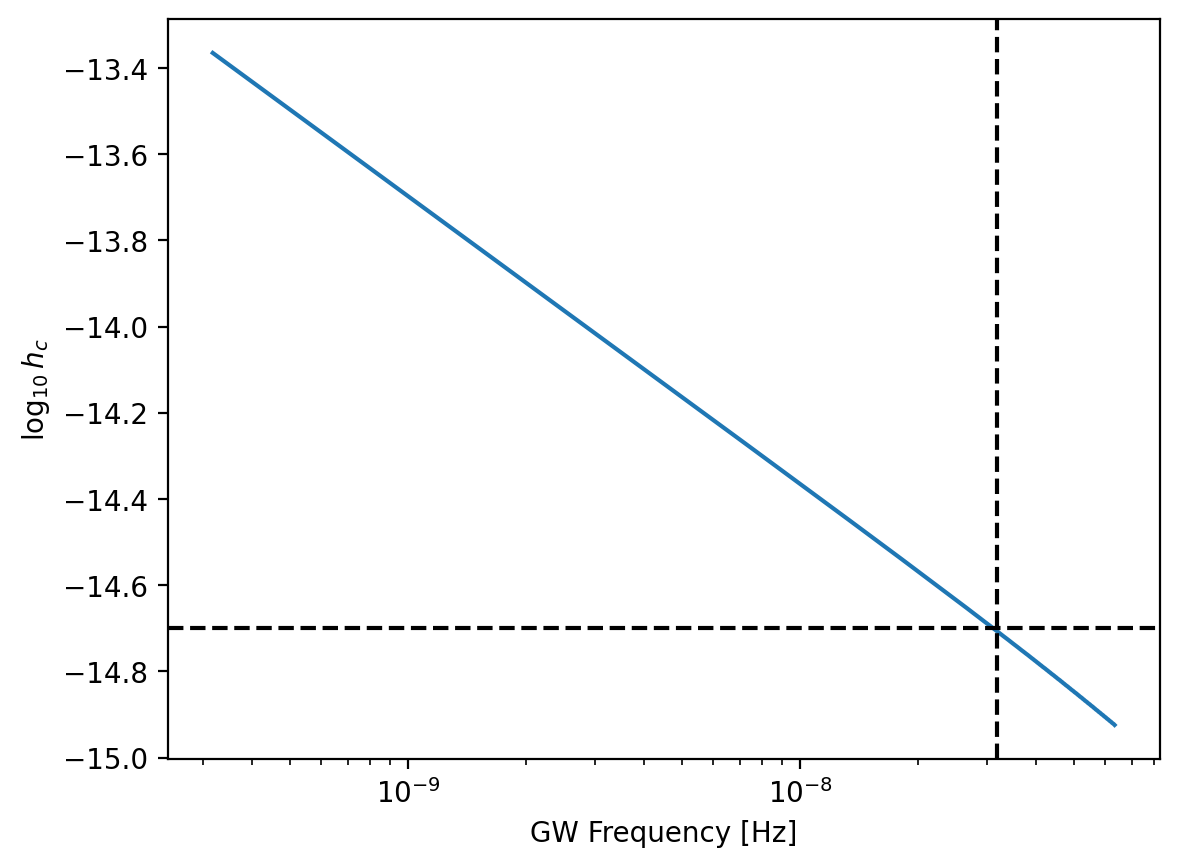

In [280]:
plt.plot(10**ps.log10_f, log10_hc2_ideal/2)
plt.xlabel('GW Frequency [Hz]')
plt.xscale('log')
plt.ylabel(r'$\log_{10}h_c$')
plt.axhline(np.log10(2*10**-15), c='k', ls='--')
plt.axvline(1/(365.24*86400), c='k', ls='--')

Text(0, 0.5, '$\\log_{10}\\rho$')

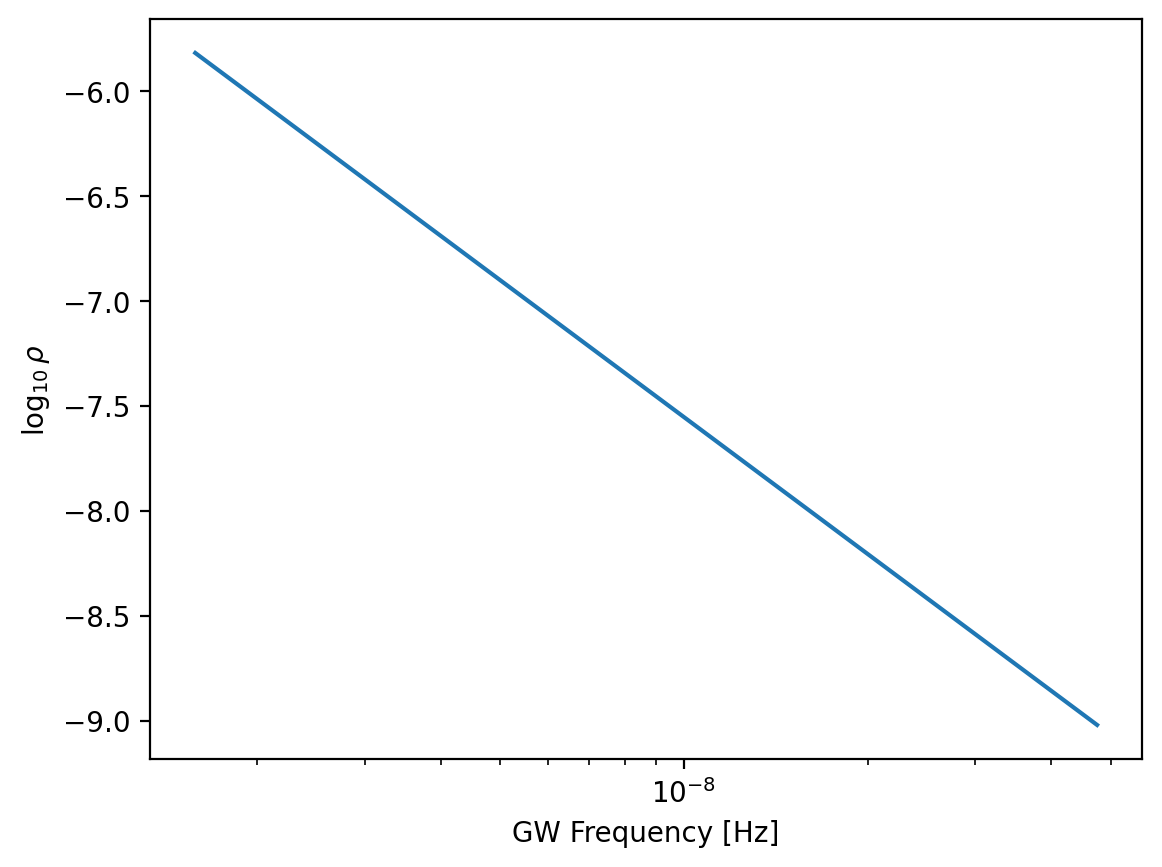

In [276]:
plt.plot(10**ps.log10_f, 0.5*(log10_hc2_ideal -
                           np.log10(12*np.pi*ps.Tspan) - 3*ps.log10_f))
plt.xlabel('GW Frequency [Hz]')
plt.xscale('log')
plt.ylabel(r'$\log_{10}\rho$')

In [284]:
# compute dN for freq bin f
from scipy.special import logsumexp
dN = np.zeros((5, 100))
models = [model1, model2, model3, model4, model5]
Tspan = 20 * 365.24 * 86400.0

for ii in range(5):
    ps = pop_synth.PopSynth(zbins=bins, log10Mbins=bins, Tspan=Tspan,
                            Nfreqs=100, model_params=models[ii])
    for log10_fi in range(100):
        dlog10f = ps.dlog10_f[log10_fi]
        log10_M_eff = ps.log10_M[ps.log10_M <= ps.max_mass[log10_fi]]
        phi_dist = ps.smbhb_number_per_bin(ps.log10_f[log10_fi],
                                           ps.z[None, :],
                                           log10_M_eff[:, None],
                                           models[ii])
        #dN[ii, log10_fi] = logsumexp(phi_dist[log10_fi].flatten() * np.log(10),
        #                             b=dlog10f * ps.dz * ps.dlog10_M) / np.log(10)
        dN[ii, log10_fi] = np.trapz(np.trapz(10**phi_dist, ps.z, axis=1),
                                    log10_M_eff) #* ps.dlog10_f[log10_fi]

/var/folders/n5/tlyhfd1j5s7gm9fxj02byc0c0000gn/T/ipykernel_36812/1522803018.py:1: RuntimeWarning: divide by zero encountered in log10
  [plt.step(10**ps.log10_f, np.log10(dN[ii]), where='mid', label=f'Model {ii+1}') for ii in range(5)];


ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

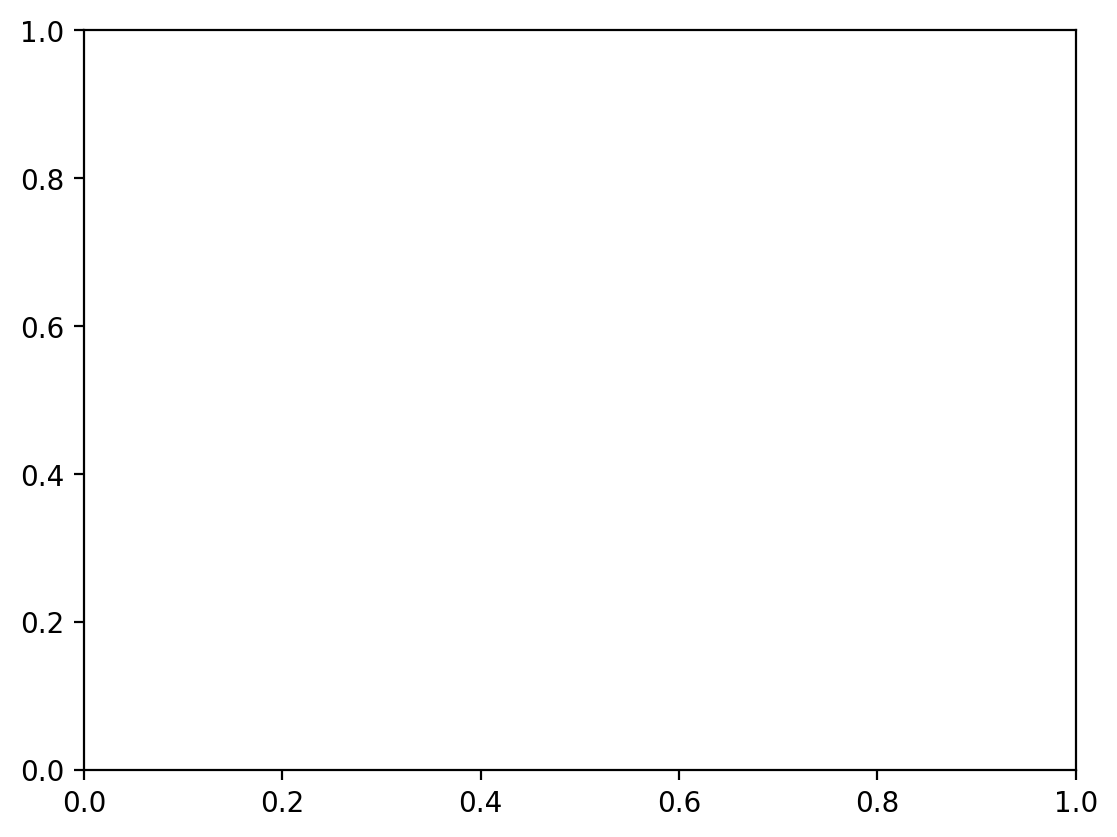

In [285]:
[plt.step(10**ps.log10_f, np.log10(dN[ii]), where='mid', label=f'Model {ii+1}') for ii in range(5)];
plt.plot(10**ps.log10_f, -12-(8/3) * ps.log10_f, label=r'$\propto f^{-2/3}$', ls='--', c='k')
plt.xscale('log')
plt.ylim(0)
plt.xlim(1e-9, 1e-7)
plt.xlabel('GW Frequency')
plt.ylabel(r'$\log_{10} N$')
plt.legend();